### 14P Final Project Data Visuals

Team Name: Binbin Xu, Hanh (Happy) Han, Quiana Ma

Imports

In [1]:
import numpy as np
from numpy import random 
import pandas as pd
import simpleaudio as sa
from matplotlib import pyplot as plt

### Functions

Locate 2nd and 4th errors 

Plus, find the threshold

In [2]:
def locate_second_wrong(data_table,key_column):
    count_wrong = 0
    for index, value in enumerate (data_table[key_column]):
        if value == 'wrong':
            count_wrong += 1
            if count_wrong ==2:
                return index

def locate_last_wrong(data_table,key_column):
    count_wrong = 0
    for index, value in enumerate (data_table[key_column]):
        if value == 'wrong':
            count_wrong += 1
            if count_wrong ==4:
                return index

def df_mean(data_frame):
    second_w = locate_second_wrong(data_frame,'Result')
    last_w = locate_last_wrong(data_frame,'Result')
    df = data_frame['note_difference']
    return np.mean(df[second_w:last_w])

Line Graph Functions

In [3]:
#note: use cut data for "dataframe"
#data frame correlates to the 3 frequences (440, 880, 1760)
#the only part we're "hard-coding" is changing the subject number

def graph_freq(data_frame1,data_frame2,data_frame3,subject_name):

    np.array(data_frame1)
    x_440 = data_frame1['Trial Numbers']
    y_440 = data_frame1['note_difference']
    correct_trials_440 = data_frame1['Result'] == 'correct'
    incorrect_trials_440 = data_frame1['Result'] == 'wrong'

    np.array(data_frame2)
    x_880 = data_frame2['Trial Numbers']
    y_880 = data_frame2['note_difference']
    correct_trials_880 = data_frame2['Result'] == 'correct'
    incorrect_trials_880 = data_frame2['Result'] == 'wrong'

    np.array(data_frame3)
    x_1760 = data_frame3['Trial Numbers']
    y_1760 = data_frame3['note_difference']
    correct_trials_1760 = data_frame3['Result'] == 'correct'
    incorrect_trials_1760 = data_frame3['Result'] == 'wrong'
    
    #plotting
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_axes([0,0,1,1])
    ax.plot(x_440[:6],y_440[:6],'r--',label = '440 training')
    ax.plot(x_880[:6],y_880[:6],'g--',label = '880 training')
    ax.plot(x_1760[:6],y_1760[:6],'b--',label = '1760 training')
    ax.plot(x_440[5:],y_440[5:],'r-',label = '440 experiment')
    ax.plot(x_880[5:],y_880[5:],'g-',label = '880 experiment')
    ax.plot(x_1760[5:],y_1760[5:],'b-',label = '1760 experiment')

    ax.plot(x_440[correct_trials_440],y_440[correct_trials_440],'k.',label = 'correct')
    ax.plot(x_440[incorrect_trials_440],y_440[incorrect_trials_440],'kx',label = 'incorrect')
    ax.plot(x_880[correct_trials_880],y_880[correct_trials_880],'k.')
    ax.plot(x_880[incorrect_trials_880],y_880[incorrect_trials_880],'kx')
    ax.plot(x_1760[correct_trials_1760],y_1760[correct_trials_1760],'k.')
    ax.plot(x_1760[incorrect_trials_1760],y_1760[incorrect_trials_1760],'kx')

    ax.legend()
    ax.set_xlabel('Trial Number',fontsize = 16)
    ax.set_ylabel('Frequency Difference',fontsize = 16)
    ax.set_title(subject_name)
    return plt.show()

Bar Graph Function

In [4]:
def bar_graph_threshold(freq_440,freq_880,freq_1760,subject_name):
    all_df_mean = [df_mean(freq_440),df_mean(freq_880),df_mean(freq_1760)]
    freq_labels = ['440 Hz','880 Hz', '1760 Hz']
    fig = plt.figure(figsize = (4,3))
    ax = fig.add_axes([0,0,1,1])
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Difference of Frequency (df)')
    ax.bar(freq_labels,all_df_mean,color = 'pink')
    ax.set_title(subject_name)
    return plt.show()

### Reading CSV Files 

Combining training and experiment

Subject 1: Happy

In [5]:
#440 Hz
subj_01_440_train = pd.read_csv('training4401.csv')
subj_01_440_experiment= pd.read_csv('Experiment Data 4401.csv')
subj_01_440 = pd.concat([subj_01_440_train,subj_01_440_experiment],axis=0)
subj_01_440['Trial Numbers']=np.arange(0,55,1)

#880 Hz
subj_01_880_train = pd.read_csv('training8801.csv')
subj_01_880_experiment= pd.read_csv('Experiment Data 8801.csv')
subj_01_880 = pd.concat([subj_01_880_train,subj_01_880_experiment],axis=0)
subj_01_880['Trial Numbers']=np.arange(0,55,1)

#1760
subj_01_1760_train = pd.read_csv('training17601.csv')
subj_01_1760_experiment= pd.read_csv('Experiment Data 17601.csv')
subj_01_1760 = pd.concat([subj_01_1760_train,subj_01_1760_experiment],axis=0)
subj_01_1760['Trial Numbers']=np.arange(0,55,1)

In [6]:
cut_subj_01_440 = subj_01_440[:locate_last_wrong(subj_01_440,'Result') +1]
cut_subj_01_880 = subj_01_880[:locate_last_wrong(subj_01_880,'Result') +1]
cut_subj_01_1760 = subj_01_1760[:locate_last_wrong(subj_01_1760,'Result') +1]

Subject 2: Bin

In [7]:
#440 Hz
subj_02_440_train = pd.read_csv('training4402.csv')
subj_02_440_experiment= pd.read_csv('Experiment Data 4402.csv')
subj_02_440 = pd.concat([subj_02_440_train,subj_02_440_experiment],axis=0)
subj_02_440['Trial Numbers']=np.arange(0,55,1)

#880 Hz
subj_02_880_train = pd.read_csv('training8802.csv')
subj_02_880_experiment= pd.read_csv('Experiment Data 8802.csv')
subj_02_880 = pd.concat([subj_02_880_train,subj_02_880_experiment],axis=0)
subj_02_880['Trial Numbers']=np.arange(0,55,1)

#1760
subj_02_1760_train = pd.read_csv('training17602.csv')
subj_02_1760_experiment= pd.read_csv('Experiment Data 17602.csv')
subj_02_1760 = pd.concat([subj_02_1760_train,subj_02_1760_experiment],axis=0)
subj_02_1760['Trial Numbers']=np.arange(0,55,1)

Cutting the Empty Data

In [8]:
cut_subj_02_440 = subj_02_440[:locate_last_wrong(subj_02_440,'Result') +1]
cut_subj_02_880 = subj_02_880[:locate_last_wrong(subj_02_880,'Result') +1]
cut_subj_02_1760 = subj_02_1760[:locate_last_wrong(subj_02_1760,'Result') +1]

Subject 3: Quiana

In [9]:
#440 Hz
subj_03_440_train = pd.read_csv('training4403.csv')
subj_03_440_experiment= pd.read_csv('Experiment Data 4403.csv')
subj_03_440 = pd.concat([subj_03_440_train,subj_03_440_experiment],axis=0)
subj_03_440['Trial Numbers']=np.arange(0,55,1)

#880 Hz
subj_03_880_train = pd.read_csv('training8803.csv')
subj_03_880_experiment= pd.read_csv('Experiment Data 8803.csv')
subj_03_880 = pd.concat([subj_03_880_train,subj_03_880_experiment],axis=0)
subj_03_880['Trial Numbers']=np.arange(0,55,1)

#1760
subj_03_1760_train = pd.read_csv('training17603.csv')
subj_03_1760_experiment= pd.read_csv('Experiment Data 17603.csv')
subj_03_1760 = pd.concat([subj_03_1760_train,subj_03_1760_experiment],axis=0)
subj_03_1760['Trial Numbers']=np.arange(0,55,1)

In [10]:
cut_subj_03_440 = subj_03_440[:locate_last_wrong(subj_03_440,'Result') +1]
cut_subj_03_880 = subj_03_880[:locate_last_wrong(subj_03_880,'Result') +1]
cut_subj_03_1760 = subj_03_1760[:locate_last_wrong(subj_03_1760,'Result') +1]

# Graphing 

### Line graphs

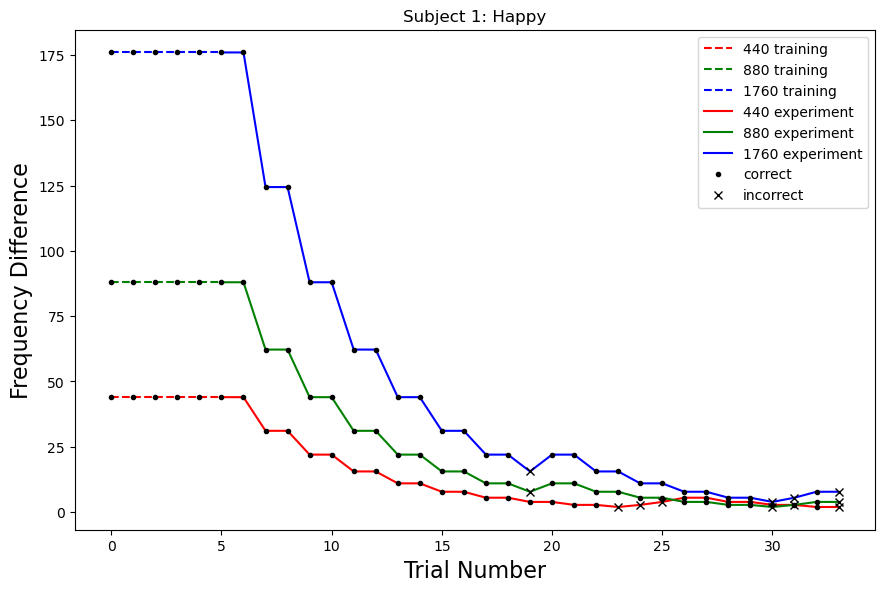

In [11]:
graph_freq(cut_subj_01_440,cut_subj_01_880,cut_subj_01_1760,"Subject 1: Happy")

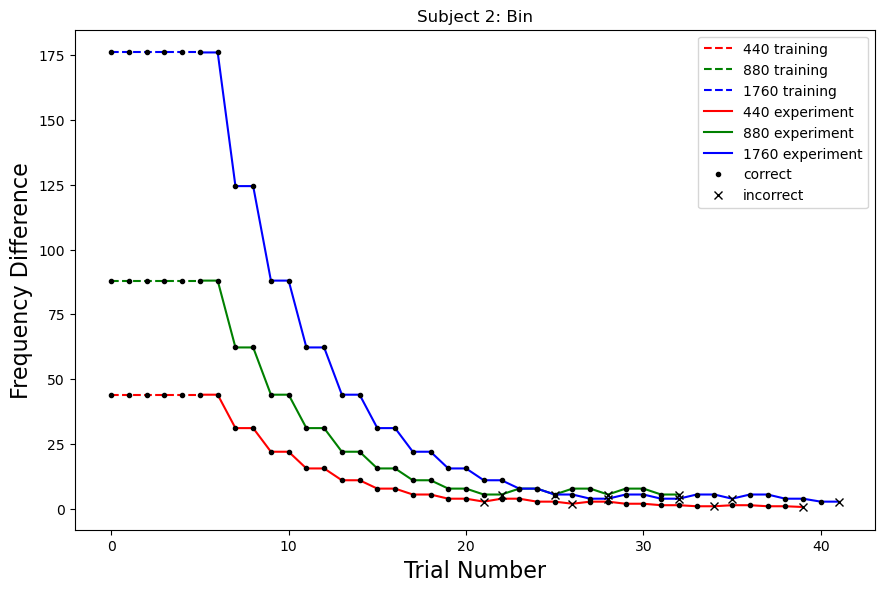

In [12]:
graph_freq(cut_subj_02_440,cut_subj_02_880,cut_subj_02_1760,"Subject 2: Bin")

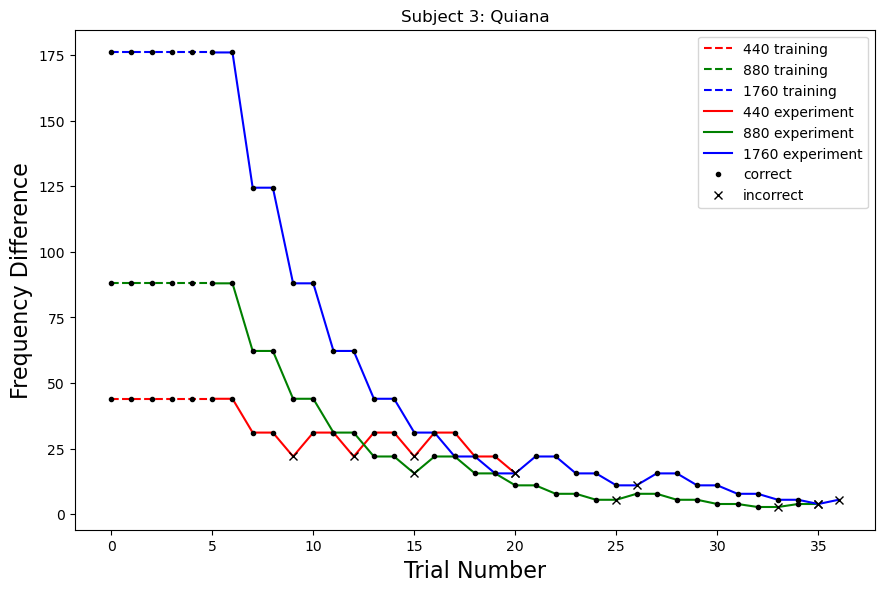

In [13]:
graph_freq(cut_subj_03_440,cut_subj_03_880,cut_subj_03_1760,"Subject 3: Quiana")


### Bar Graphs

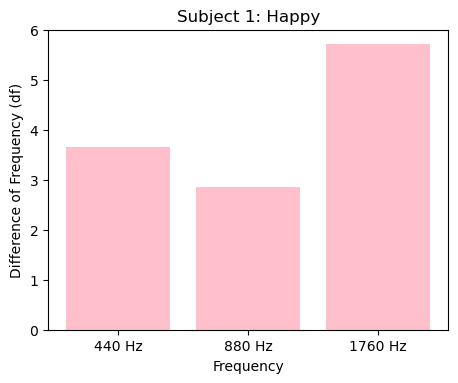

In [14]:
bar_graph_threshold(subj_01_440_experiment,subj_01_880_experiment,subj_01_1760_experiment,'Subject 1: Happy')

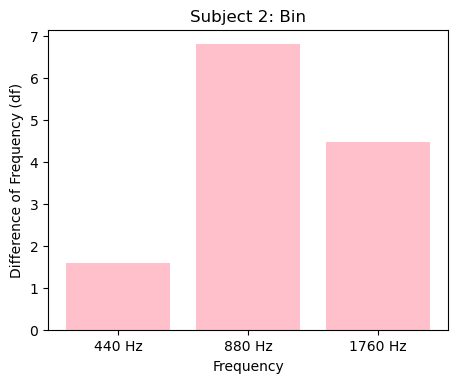

In [15]:
bar_graph_threshold(subj_02_440_experiment,subj_02_880_experiment,subj_02_1760_experiment,'Subject 2: Bin')

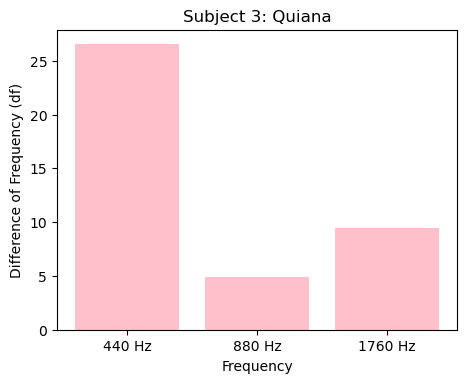

In [16]:
bar_graph_threshold(subj_03_440_experiment,subj_03_880_experiment,subj_03_1760_experiment,'Subject 3: Quiana')